<a href="https://colab.research.google.com/github/aline-tuty/SemanaDados2021_Alura/blob/main/ProjetoFinal_Imersao_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alguns Disclaimers importantes**

Primeiramente, se vc está vendo esse arquivo no GitHub, eu recomendo que vc vá pra página do Google Colab, porque fica tão mais organizado e visualmente mais fácil de se achar. (Aqui no GitHub fica tudo um textão corrido e ai fica muito poluído visualmente).
[Abrir Colab](https://colab.research.google.com/drive/1iTtIwTQc6QroJi68E7RHgBM-Cx2BS4M3?usp=sharing)

Segundo, esse é: meu primeiro Colab, meu início em python, em data science, em programação, em GitHub ... enfim em quase TUDO que está nesse arquivo (rs). Única coisa que eu já tinha experiencia mesmo é com vias celulares, expressões gênicas, os modelos de experimento na parte da execução (bancada) e um pouco de estatística.

Por isso, com certeza tem muuuito a ser melhorado por ai! E se vc quiser me sugerir coisas nesse sentido, fique a vontade, inclusive agradeço muito se vc o fizer!

E agora vamos à prática! Mão na massa!



###Conhecendo a base de dados:

Importando os dados dos experimentos:

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados_exp = pd.read_csv(url_dados, compression = 'zip')
dados_exp

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

Importando os dados dos resultados:

In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Removendo os - das colunas do dados experimentais:

In [ ]:
dados_exp = dados_exp.rename(lambda x: x.replace('-', ''), axis=1)

In [ ]:
dados_exp.head(10)

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.6701,2.0780,1.3350,0.9889,0.5017,2.0020,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1

Vemos que cada droga aparece em 6 linhas da tabela, o que corresponde as doses (D1 e D2) e aos tempos (24,48,72)

In [ ]:
dados_exp.query('droga == "746ca1f5a"').count()

id            6
tratamento    6
tempo         6
dose          6
droga         6
             ..
c95           6
c96           6
c97           6
c98           6
c99           6
Length: 877, dtype: int64

In [ ]:
dados_exp.groupby(['tratamento']).count()

,id,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
tratamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
com_controle,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,...,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866,1866
com_droga,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,...,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948,21948


In [ ]:
x = 21948/6
x

3658.0

In [ ]:
y= 1866/3658
y

0.5101148168398032

In [ ]:
dados_exp.query('droga == "cacb2b860"').count()

id            1866
tratamento    1866
tempo         1866
dose          1866
droga         1866
              ... 
c95           1866
c96           1866
c97           1866
c98           1866
c99           1866
Length: 877, dtype: int64

In [ ]:
dados_exp.groupby(['tratamento','droga']).count()

id  tempo  dose    g0  ...   c96   c97   c98   c99
tratamento   droga                               ...                        
com_controle cacb2b860  1866   1866  1866  1866  ...  1866  1866  1866  1866
com_droga    00199ff52     6      6     6     6  ...     6     6     6     6
             00251fc41     6      6     6     6  ...     6     6     6     6
             00321ea80    12     12    12    12  ...    12    12    12    12
             0034c0847     6      6     6     6  ...     6     6     6     6
...                      ...    ...   ...   ...  ...   ...   ...   ...   ...
             ff9565933     6      6     6     6  ...     6     6     6     6
             ffd66e220     6      6     6     6  ...     6     6     6     6
             ffe357f8f     1      1     1     1  ...     1     1     1     1
             ffed8e1c9     6      6     6     6  ...     6     6     6     6
             fff7d208d     6      6     6     6  ...     6     6     6     6

[3289 rows x 875 columns]

In [ ]:
z= 1866/3288
z

0.5675182481751825

###Vemos que o total de drogas testas (3288) é aproximadamente o dobro do total de amostras controle (1866). Isso sugere que cada experimento testando duas novas drogas (em aproximadamente 6 condições diferentes), havia uma droga controle junto.

###Ou seja, temos no total menos amostras controle porque para cada droga com todas as 6 condições precisamos apenas de um controle e  no mesmo experimento foi avaliado duas drogas juntas. Isso faz com que a quantidade de amostras controle seja mesmo muito menor que as amotras tratadas com compostos.

###Conhecendo as amostras Controle

#####Colocando em prática os conceitos vistos em aula
> 1- tipos diferentes de gráficos;<br>
> 2- funções query e groupby;<br>
> 3- fazer slices do DF com .loc





### Será que a expressão genica de todos as amostras 'controle' é semelhante?

In [ ]:
genes_controle = dados_exp.query('tratamento =="com_controle"')
genes_controle = genes_controle.drop(genes_controle.loc[:,'c0':'c99'],axis=1)
genes_controle

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,-0.0612,0.7248,-0.0324,-0.5810,-0.3332,1.0640,1.0330,0.2024,-0.1460,-0.4562,-0.9914,0.8520,0.3653,0.3959,0.4648,2.2980,-0.8437,0.0271,-0.5029,-0.2724,0.1455,-0.0212,0.5072,-2.5700,-0.4327,-0.2617,0.4388,-0.6653,1.1630,0.2737,0.8937,0.8077,-0.5922,-0.6658,-0.1981,-0.6355,1.4330,-0.5536,0.9114,-0.2252
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.2377,1.0730,1.1600,0.1480,0.4218,-1.3520,1.8700,1.3840,-0.9759,0.1939,0.9702,-0.3498,0.6567,-0.4230,0.8181,-0.1300,-0.0255,0.7296,0.2057,-0.3948,-1.0550,0.0779,-0.5079,-1.5140,0.3946,1.1480,0.0969,0.3722,-0.7680,-0.0144,0.7429,0.6086,-0.9162,-0.9979,0.3848,0.0771,-0.5996,-1.2080,1.2200,0.3098
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,-0.2106,-0.0708,0.1752,0.7474,1.1850,-2.3650,0.3582,0.9623,0.8881,0.4459,0.1489,-0.3390,0.8606,0.2172,-0.2639,-0.4238,-0.6218,1.0790,0.2757,1.1840,-0.4539,-0.2165,0.6984,-0.5860,0.4745,0.6033,1.2140,0.3543,-0.4462,0.6421,0.1228,-0.0254,-2.1670,-1.3930,0.0077,0.1340,-1.1390,-0.0679,0.9376,0.0464
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2546,0.0286,0.8154,0.3663,0.1665,0.1305,0.9754,-0.1904,-1.1990,-1.3090,0.0619,0.3662,-0.2858,1.0320,-0.9584,0.7917,-0.5166,0.3122,-0.5081,0.8953,0.2762,0.5908,0.4345,0.8694,-0.5372,-0.2366,0.2262,-0.1550,0.8013,-0.1982,-0.5216,-0.0786,-0.5446,-0.2518,-0.7777,0.0389,-0.0621,-0.6839,-0.6853,-0.6166
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.5059,-0.4869,0.4229,-0.2940,0.5216,1.4520,0.9965,1.0860,0.5140,-1.5090,0.5096,0.3403,-0.4868,0.9424,0.3823,-0.4681,0.6167,1.3420,-0.7232,-0.2392,-0.1972,-0.6169,0.4674,-0.0951,0.3609,-0.1002,-0.0452,0.1412,0.2133,-0.3222,0.0040,-0.1404,-0.1641,0.0185,-1.2400,-0.7644,0.0257,-0.2084,0.7128,0.0337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0.0938,-0.6062,0.6108,-0.49

In [ ]:
ver = genes_controle.groupby(['tempo','dose']).describe()
ver

g0                             ...    g771                        
            count      mean       std    min  ...     25%     50%      75%    max
tempo dose                                    ...                                
24    D1    301.0 -0.251760  0.751395 -2.370  ... -1.0390 -0.5199  0.07940  5.042
      D2    305.0  0.010754  0.836626 -2.135  ... -0.7858 -0.1878  0.32110  1.975
48    D1    343.0 -0.122773  0.853396 -3.276  ... -0.9173 -0.3794  0.14050  4.099
      D2    305.0  0.013174  0.836845 -4.859  ... -0.5551  0.0365  0.51630  4.872
72    D1    307.0 -0.295271  0.769294 -2.086  ... -0.6584 -0.1603  0.19695  2.428
      D2    305.0  0.070250  0.878041 -1.909  ... -0.4854  0.0138  0.40690  2.185

[6 rows x 6176 columns]

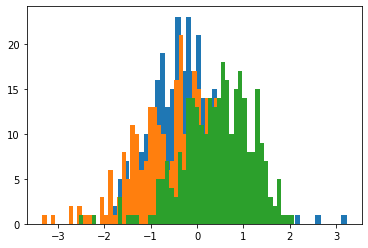

In [ ]:
from matplotlib import pyplot

a = genes_controle.query('tempo =="24" & dose =="D1"')
pyplot.hist(a['g0'],bins=50, label ='g0' )
pyplot.hist(a['g1'],bins=50, label ='g1' )
pyplot.hist(a['g50'],bins=50, label ='g50' )
pyplot.show()

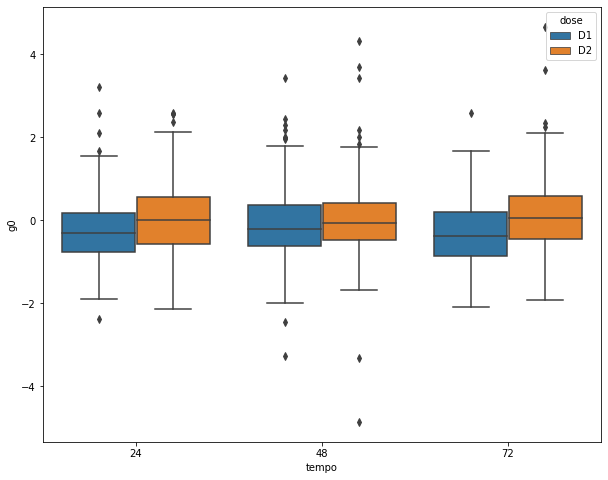

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x= 'tempo', data=genes_controle, hue= 'dose')
plt.show()

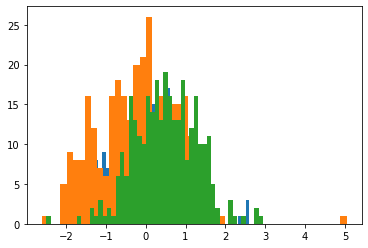

In [ ]:
ab = genes_controle.query('tempo =="24" & dose =="D2"')
pyplot.hist(ab['g0'],bins=50, label ='g0' )
pyplot.hist(ab['g1'],bins=50, label ='g1' )
pyplot.hist(ab['g50'],bins=50, label ='g50' )
pyplot.show()

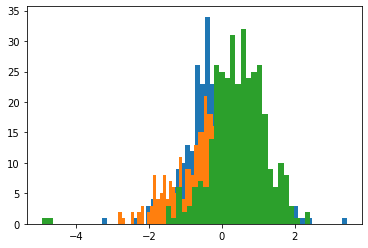

In [ ]:
b = genes_controle.query('tempo =="48" & dose =="D1"')
pyplot.hist(b['g0'],bins=50, label ='g0' )
pyplot.hist(b['g1'],bins=50, label ='g1' )
pyplot.hist(b['g50'],bins=50, label ='g50' )
pyplot.show()

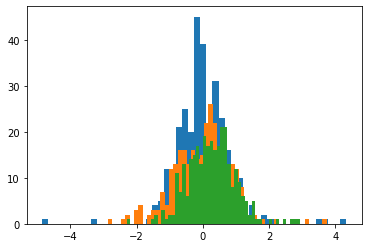

In [ ]:
bb = genes_controle.query('tempo =="48" & dose =="D2"')
pyplot.hist(bb['g0'],bins=50, label ='g0' )
pyplot.hist(bb['g1'],bins=50, label ='g1' )
pyplot.hist(bb['g50'],bins=50, label ='g50' )
pyplot.show()

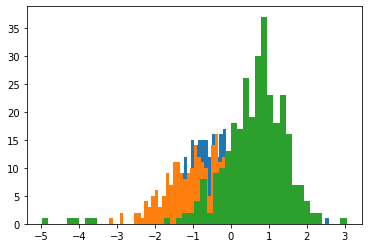

In [ ]:
c = genes_controle.query('tempo =="72" & dose =="D1"')
pyplot.hist(c['g0'],bins=50, label ='g0' )
pyplot.hist(c['g1'],bins=50, label ='g1' )
pyplot.hist(c['g50'],bins=50, label ='g50' )
pyplot.show()

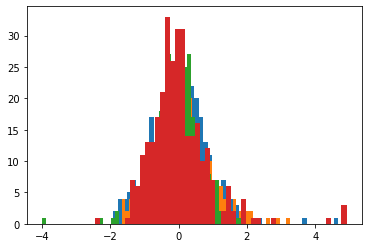

In [ ]:
cb = genes_controle.query('tempo =="72" & dose =="D2"')
pyplot.hist(cb['g0'],bins=50, label ='g0' )
pyplot.hist(cb['g1'],bins=50, label ='g1' )
pyplot.hist(cb['g50'],bins=50, label ='g50')
pyplot.hist(cb['g710'],bins=50, label ='g710')
pyplot.show()

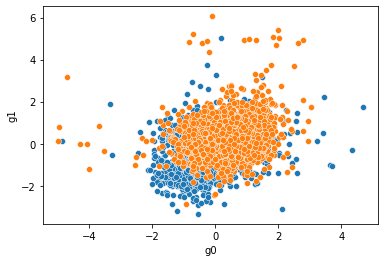

In [ ]:
sns.scatterplot(x='g0', y = 'g1', data=genes_controle ) #hue='dose', label='one'
sns.scatterplot(x='g50', y = 'g710', data=genes_controle) #hue='dose',label='two'

###Mesmo dentro apenas das amostras 'controle' vemos que o mesmo gene (por exemplo g0) varia com o tempo e a dose. Portanto quando comparar as drogas devemos levar isso em consideração.
###Além disso parece que a distribuição dos genes tem um corportamento relativamente constante, ou seja o g0, g1 e posivelmente qquer outro estão mais ou menos proximos em média e distribuição.

######gráficos de correlação

In [ ]:
genes_controle.loc[:,'g0':'g70'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70
g0,1.000000,0.278414,0.120073,-0.254715,0.243430,-0.078385,0.098529,0.324506,-0.040929,-0.169902,-0.057909,0.087228,0.106227,-0.025988,0.070775,-0.311054,-0.176211,-0.076394,-0.134247,0.064048,-0.268199,0.226825,0.002039,0.145110,0.098907,-0.032722,-0.198282,-0.044269,0.040625,-0.004215,-0.063319,-0.076091,0.236905,-0.224142,-0.042911,0.163487,0.056421,-0.156991,-0.057954,0.069240,-0.070560,-0.022826,0.073978,0.312079,-0.147327,0.015265,0.050109,-0.153372,0.073209,-0.134104,-0.011991,-0.161811,0.021988,-0.029346,-0.012987,0.065978,-0.212769,-0.236908,-0.009342,0.181702,-0.161433,0.154146,0.141825,0.176692,0.074489,0.006663,-0.389789,0.033149,0.041169,-0.060433,-0.012196
g1,0.278414,1.000000,-0.146932,-0.215743,0.428783,-0.220556,-0.130089,0.348078,-0.033250,-0.085719,-0.079820,0.126601,0.035171,-0.074226,-0.054107,-0.069739,-0.076128,-0.025037,-0.070185,-0.033169,-0.391980,0.318960,0.001823,0.106188,0.192665,-0.127166,-0.091434,-0.016912,-0.110550,-0.174085,-0.139762,-0.196070,0.283479,-0.095695,-0.054223,0.271855,-0.130727,-0.224774,-0.126248,0.104689,-0.151515,-0.206135,0.271998,0.337617,-0.180522,-0.019747,0.037883,-0.062010,0.151531,-0.170187,-0.337299,-0.146999,0.028968,-0.070940,-0.118155,0.214905,-0.161346,-0.227954,-0.173209,0.268825,-0.107248,0.261879,0.191979,0.260350,0.191459,-0.018132,-0.124223,0.090640,0.341162,-0.209976,0.122460
g2,0.120073,-0.146932,1.000000,0.067791,-0.177726,0.083615,0.014635,-0.013742,0.029072,0.018838,0.067212,-0.049795,0.006602,-0.016085,0.076147,-0.068147,-0.061541,0.035509,0.117308,-0.010019,0.129362,-0.150388,0.003300,-0.014158,-0.020121,0.057223,-0.035458,0.012172,0.049776,0.103787,0.028210,0.137083,-0.110989,-0.045448,0.020181,-0.102214,0.122354,-0.046809,0.025234,0.025793,0.008318,0.088593,-0.210525,-0.109828,0.074911,0.010372,0.000823,-0.026573,-0.094286,0.062052,0.142242,0.027900,0.076933,0.006272,0.019770,-0.185609,-0.028179,-0.010306,0.187649,-0.173235,0.099802,-0.057820,0.039243,-0.153451,-0.190751,0.018021,-0.037652,-0.021921,-0.172374,0.129871,-0.065353
g3,-0.254715,-0.215743,0.067791,1.000000,-0.207237,-0.004475,-0.158666,-0.217802,0.017650,0.094637,0.175163,0.013602,0.089233,0.049573,0.208241,0.149021,0.094484,0.007284,0.241796,0.005623,0.182004,-0.291068,0.099902,-0.161302,-0.140823,0.179844,0.262467,0.163179,0.131411,0.062051,0.204576,0.119892,-0.168620,0.110274,0.187957,-0.226323,-0.008378,-0.004200,0.125785,-0.034416,0.045542,-0.017556,-0.189693,-0.253980,0.099715,-0.005373,-0.000743,0.195044,-0.023883,0.156814,0.052089,0.160138,0.045813,0.164132,0.068991,-0.184821,0.056972,0.235051,0.120216,-0.254218,0.284017,-0.123918,-0.118066,-0.192528,-0.166190,0.034988,0.214002,-0.085868,-0.051859,0.054638,-0.087649
g4,0.243430,0.428783,-0.177726,-0.207237,1.000000,-0.000259,0.206923,0.556768,-0.305904,-0.190803,-0.424017,0.072940,-0.138152,-0.116635,-0.188134,0.035243,0.061959,-0.281855,-0.099495,0.059117,-0.318704,0.526510,-0.167245,0.038335,0.318610,-0.143341,-0.264517,-0.179126,-0.251663,-0.100767,-0.287094,-0.159297,0.425451,-0.124029,-0.176034,0.120501,-0.276301,-0.071219,-0.278541,0.029716,-0.025249,-0.054175,0.439549,0.443130,-0.243990,0.109904,0.048949,-0.281961,-0.025619,-0.347453,-0.290286,-0.256150,0.069942,-0.141351,-0.156048,0.394256,-0.204681,-0.369625,-0.209863,0.371551,-0.152906,0.517381,0.004677,0.540898,0.456863,-0.215425,-0.206273,0.024005,0.339168,-0.166918,0.171209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g66,-0.389789,-0.124223,-0.037652,0.214002,-

In [ ]:
corr = genes_controle.loc[:,'g0':'g70'].corr()
corr.query('@corr >0.5 | @corr < -0.5')

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70
g0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.556768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.517381,NaN,0.540898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
g67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
g68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
g69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


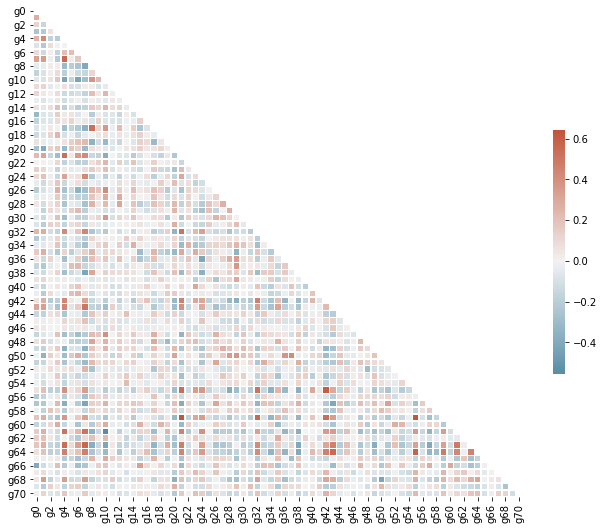

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Depois destes gráficos de correlação, parece que todas correlações são bem fracas (menor que 0,6). (Na verdade a maioria é menor que 0,5, até ) [Direta ou inversa (pensando nesses valores em módulo) ]

### E dentro dos sub-tipos celulares?


In [ ]:
celula_controle = dados_exp.query('tratamento =="com_controle"')
celula_controle = celula_controle.drop(celula_controle.loc[:,'g0':'g771'],axis=1)
celula_controle

,id,tratamento,tempo,dose,droga,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
25,id_0054388ec,com_controle,48,D1,cacb2b860,0.4665,0.2532,0.7212,-0.4467,0.7621,0.2687,-0.1338,0.6366,0.6220,-0.3014,0.7567,1.2480,0.6420,1.5370,0.8386,0.8053,0.1935,1.3500,0.4042,1.5230,0.0741,0.2019,0.3635,0.3103,0.8123,0.4770,0.4972,0.4685,0.4348,0.5421,0.4056,0.4867,0.0763,0.9938,0.2260,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,0.1431,-0.1254,-0.0740,0.0288,-0.7198,-1.0040,0.3443,-0.6593,0.1020,-0.1742,0.0873,0.0208,0.1540,-0.6229,-0.3923,0.0964,-1.0500,0.9068,-0.0658,-0.1852,0.0576,0.5113,-0.3795,0.1957,-0.3674,0.1904,-0.1540,0.4123,-0.8581,-0.2263,0.7330,-0.4364,-0.3330,-0.4074,-0.6630,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,0.8107,0.7110,-0.0797,0.1703,1.7100,-0.0436,-0.2968,0.8906,-0.5218,1.2530,0.8287,0.9787,1.1110,-0.2813,0.3524,0.6322,1.4640,0.4940,0.4516,1.0320,0.8206,-0.0691,1.0970,0.2771,0.4753,0.2259,1.0160,0.4358,0.0752,0.9084,0.7651,0.4991,1.0880,0.1440,1.0790,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,-0.6666,0.3619,-0.4816,0.3545,0.0480,-0.1306,0.3623,-1.4190,0.1975,-0.2137,-0.3358,-0.9395,-0.1191,0.5055,-0.2079,0.1760,-0.5248,0.0266,-0.1298,-0.5139,-0.4645,-0.5434,-0.7326,-0.3624,-0.1764,-0.4371,-0.6318,0.5859,0.9494,-0.7306,0.2834,-0.4326,0.4992,-0.3279,-0.4255,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.8432,0.4478,-0.8843,-0.6954,0.4762,0.9160,0.1785,0.2807,1.3500,0.1766,-0.1137,1.4910,-0.6229,-0.9833,-0.1895,0.5661,0.6124,-0.1581,0.3927,0.8244,0.5313,0.4941,-0.6869,0.0460,0.4194,0.5550,1.1300,-0.2166,0.6102,0.3593,-0.4806,0.5128,0.1520,0.8090,0.0593,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.6950,0.2731,0.6061,0.2976,0.3948,0.8336,1.1720,0.0790,0.3028,-0.0120,0.0781,0.2334,0.1682,0.3971,0.6605,-0.6505,-0.1283,-0.4924,0.1668,1.2440,-1.6380,0.5628,0.9434,0.9574,0.0359,1.1500,0.8947,-0.9647,-0.6059,0.4703,-0.1513,-0.1100,0.8922,1.6550,0.1250,...,-0.4342,0.0541,0.9346,0.

In [ ]:
sopraver = celula_controle.groupby(['tempo','dose']).describe()
sopraver

c0                             ...      c99                        
            count      mean       std    min  ...      25%     50%      75%    max
tempo dose                                    ...                                 
24    D1    301.0  0.139234  0.687028 -2.195  ... -0.03290  0.3711  0.82090  2.233
      D2    305.0  0.041709  0.667859 -2.129  ... -0.30290  0.1140  0.60050  2.193
48    D1    343.0  0.179384  0.697884 -4.119  ...  0.06940  0.5211  0.87260  2.209
      D2    305.0  0.139303  0.646701 -1.686  ... -0.30100  0.2072  0.69560  1.778
72    D1    307.0  0.169599  0.677690 -3.970  ... -0.04145  0.4315  0.75395  1.918
      D2    305.0  0.091155  0.658447 -2.006  ... -0.22740  0.2036  0.63860  1.919

[6 rows x 800 columns]

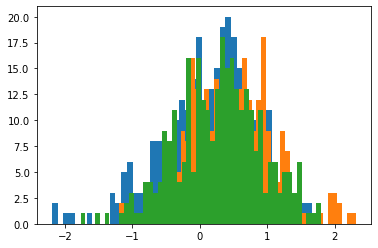

In [ ]:
cela = celula_controle.query('tempo =="24" & dose =="D1"')
pyplot.hist(cela['c0'],bins=50, label ='c0' )
pyplot.hist(cela['c1'],bins=50, label ='c1' )
pyplot.hist(cela['c50'],bins=50, label ='c50' )
pyplot.show()

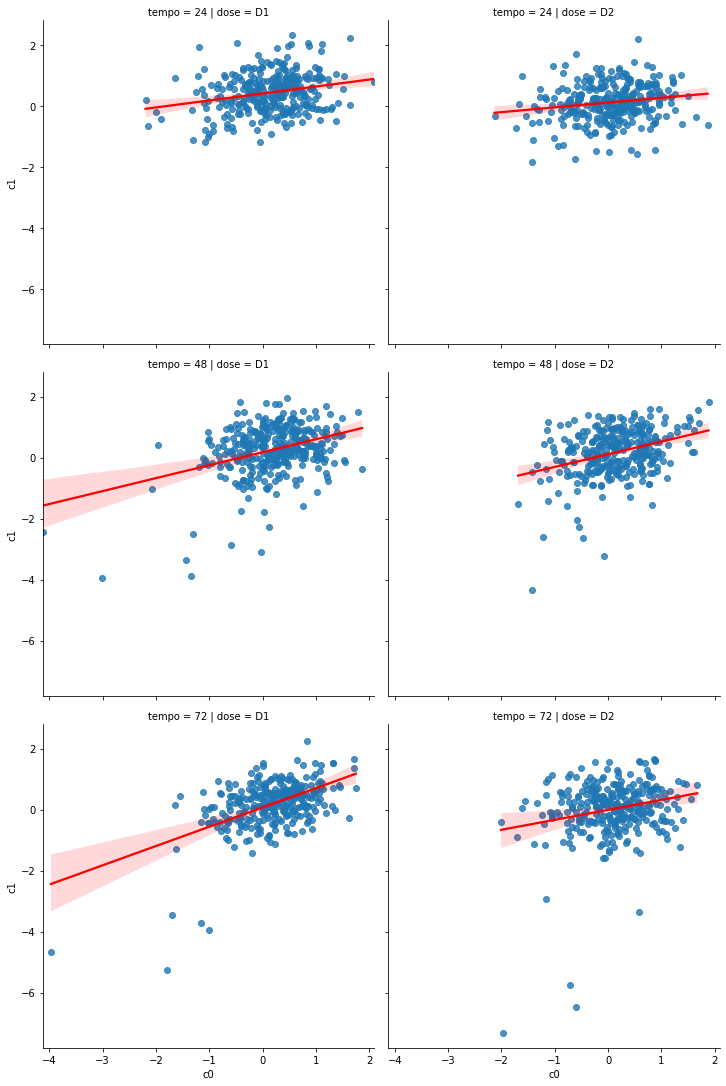

In [ ]:
sns.lmplot(data=celula_controle, x='c0', y='c1', line_kws={'color': 'red'}, col='dose', row='tempo')

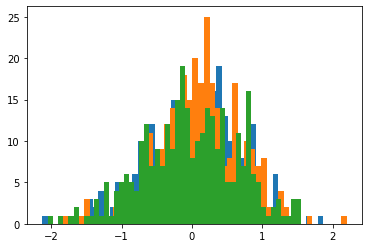

In [ ]:
celb = celula_controle.query('tempo =="24" & dose =="D2"')
pyplot.hist(celb['c0'],bins=50, label ='c0' )
pyplot.hist(celb['c1'],bins=50, label ='c1' )
pyplot.hist(celb['c50'],bins=50, label ='c50' )
pyplot.show()

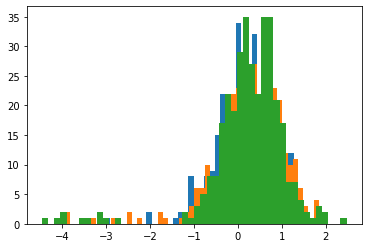

In [ ]:
celc = celula_controle.query('tempo =="48" & dose =="D1"')
pyplot.hist(celc['c0'],bins=50, label ='c0' )
pyplot.hist(celc['c1'],bins=50, label ='c1' )
pyplot.hist(celc['c50'],bins=50, label ='c50' )
pyplot.show()

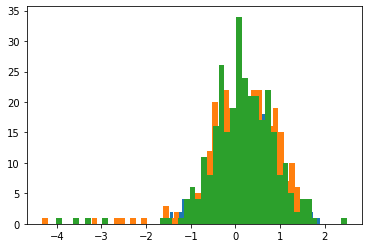

In [ ]:
celd = celula_controle.query('tempo =="48" & dose =="D2"')
pyplot.hist(celd['c0'],bins=50, label ='c0' )
pyplot.hist(celd['c1'],bins=50, label ='c1' )
pyplot.hist(celd['c50'],bins=50, label ='c50' )
pyplot.show()

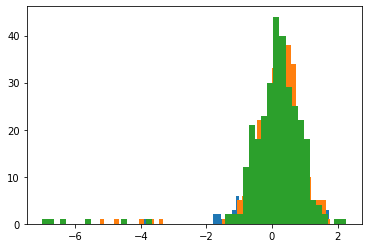

In [ ]:
celx = celula_controle.query('tempo =="72" & dose =="D1"')
pyplot.hist(celx['c0'],bins=50, label ='c0' )
pyplot.hist(celx['c1'],bins=50, label ='c1' )
pyplot.hist(celx['c50'],bins=50, label ='c50' )
pyplot.show()

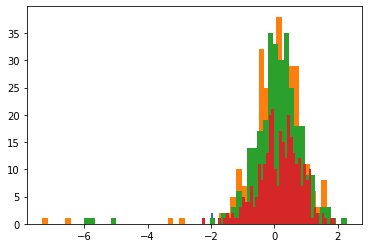

In [ ]:
cely = celula_controle.query('tempo =="72" & dose =="D2"')
pyplot.hist(cely['c0'],bins=50, label ='c0' )
pyplot.hist(cely['c1'],bins=50, label ='c1' )
pyplot.hist(cely['c50'],bins=50, label ='c50')
pyplot.hist(cely['c99'],bins=50, label ='c99')
pyplot.show()

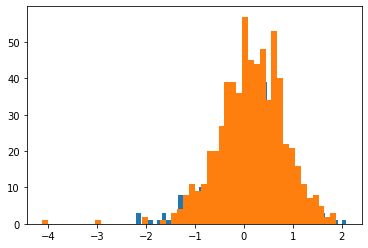

In [ ]:
celt = celula_controle.query('tempo =="24"')
celz = celula_controle.query('tempo == "48"')
pyplot.hist(celt['c0'],bins=50, label ='24' )
pyplot.hist(celz['c0'],bins=50, label ='48' )
pyplot.show()

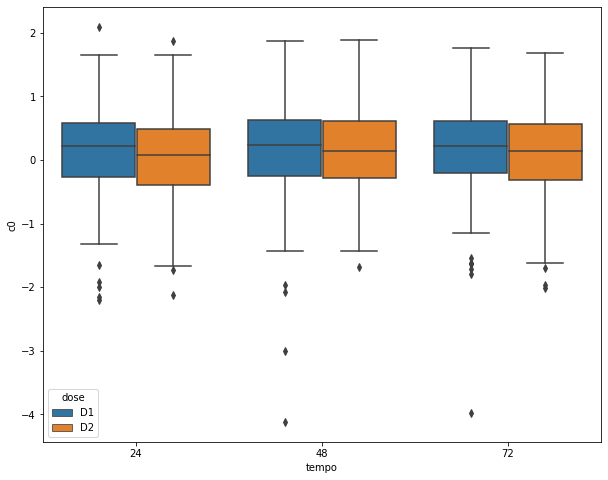

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c0', x= 'tempo', data=celula_controle, hue= 'dose')
plt.show()

###Um comportamento parecido com o observado nos genes das amostras controle (visto acima) é observado nas células das amotras controle sendo que nessa, oefeito é ainda mais homogeneo entre as células nas diferentes condições (dose e tempo). Ou seja, os diferentes tipo celulares são mais homogeneos entre si nas suas respostas frente as diferentes condições que são expostas (mesmo aprendentando variações de uma condição para a outra)

#####gráficos de correlação

In [ ]:
celula_controle.loc[:,'c0':'c70'].corr()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70
c0,1.000000,0.313804,0.335249,0.085311,0.357865,0.290006,0.310780,0.246997,0.271565,0.185741,0.353500,0.338720,0.288250,0.372363,0.221778,0.298100,0.183633,0.281777,0.319372,0.225336,0.208853,0.239936,0.292078,0.233165,0.310133,0.278986,0.376844,0.275798,0.293229,0.204704,0.224184,0.382099,0.285688,0.344813,0.345148,0.234336,0.348649,0.243130,0.327891,0.249756,0.328958,0.324364,0.360474,0.307660,0.271236,0.295973,0.258833,0.298354,0.337646,0.284004,0.259797,0.376311,0.349825,0.287243,0.302135,0.332187,0.222652,0.294126,0.202395,0.308698,0.377127,0.271888,0.307476,0.341245,0.344989,0.339168,0.318924,0.299641,0.262857,0.184970,0.348484
c1,0.313804,1.000000,0.518934,0.250136,0.491068,0.493030,0.507657,0.299713,0.412221,0.301683,0.408619,0.524814,0.475022,0.495280,0.336602,0.424420,0.172799,0.321312,0.571786,0.332824,0.236198,0.335062,0.557630,0.377976,0.455964,0.403636,0.545246,0.296360,0.480047,0.215665,0.245987,0.481199,0.345333,0.435078,0.493526,0.322429,0.539835,0.342262,0.590811,0.302326,0.516460,0.457326,0.509069,0.471320,0.330545,0.410083,0.362709,0.471692,0.581251,0.429802,0.512152,0.476152,0.516758,0.325748,0.421882,0.554643,0.339925,0.482238,0.265742,0.415478,0.472863,0.246758,0.514346,0.569278,0.421855,0.427896,0.395309,0.549410,0.254522,0.282928,0.468241
c2,0.335249,0.518934,1.000000,0.255333,0.484216,0.468479,0.511713,0.358386,0.404572,0.276619,0.468747,0.534000,0.446006,0.576883,0.323930,0.412219,0.227951,0.394547,0.590482,0.341533,0.253002,0.380420,0.511258,0.289775,0.468652,0.392527,0.559866,0.333297,0.475615,0.269107,0.336804,0.475128,0.350615,0.485632,0.471995,0.307939,0.526218,0.354429,0.584748,0.320967,0.532113,0.493254,0.497035,0.495121,0.380589,0.371911,0.363966,0.491385,0.541079,0.388612,0.468566,0.505387,0.493704,0.362335,0.448918,0.559778,0.328881,0.475963,0.267722,0.429736,0.522322,0.303601,0.465082,0.541719,0.445246,0.408919,0.418456,0.545450,0.298070,0.314568,0.417421
c3,0.085311,0.250136,0.255333,1.000000,0.269098,0.239100,0.235796,0.149444,0.188263,0.161375,0.216144,0.247910,0.214397,0.246060,0.197398,0.236260,0.107271,0.214433,0.268821,0.198814,0.110090,0.192625,0.251408,0.218181,0.211600,0.231732,0.285161,0.115321,0.234685,0.150161,0.168748,0.262949,0.183964,0.217631,0.288768,0.220730,0.301623,0.195693,0.258104,0.209367,0.296299,0.250330,0.271844,0.248974,0.166586,0.217405,0.248479,0.255297,0.297032,0.250595,0.279309,0.258139,0.280718,0.200193,0.208720,0.258711,0.203991,0.273721,0.120746,0.175067,0.209087,0.148260,0.262382,0.319590,0.268312,0.259321,0.267533,0.292874,0.193616,0.210666,0.219731
c4,0.357865,0.491068,0.484216,0.269098,1.000000,0.441183,0.484297,0.339032,0.403490,0.321616,0.468639,0.522863,0.464769,0.551105,0.323778,0.427261,0.210869,0.410291,0.523788,0.318286,0.288574,0.375574,0.493510,0.365803,0.452049,0.419059,0.544641,0.340118,0.443813,0.253985,0.299400,0.494137,0.356321,0.481572,0.491251,0.382871,0.516951,0.318943,0.565483,0.343509,0.509013,0.489443,0.494702,0.439682,0.401526,0.406583,0.398605,0.463262,0.511473,0.397308,0.480102,0.504341,0.502233,0.378337,0.459197,0.519640,0.325681,0.473182,0.256904,0.433685,0.507320,0.321877,0.481347,0.531371,0.439976,0.459329,0.462631,0.502634,0.315615,0.271417,0.440898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c66,0.318924,0.395309,0.418456,0.267533,0.462631,0.383676,0.441907,0.308149,0.353570,0.291334,0.435542,0.446219,0.379868,0.409086,0.294717,0.401848,0.226761,0.396602,0.442014,0.319216,0.336005,0.356456,0.411794,0.373697,0.39489

In [ ]:
corr = celula_controle.loc[:,'c0':'c70'].corr()
corr.query('@corr >0.5 | @corr < -0.5')

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70
c0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c1,NaN,1.000000,0.518934,NaN,NaN,NaN,0.507657,NaN,NaN,NaN,NaN,0.524814,NaN,NaN,NaN,NaN,NaN,NaN,0.571786,NaN,NaN,NaN,0.557630,NaN,NaN,NaN,0.545246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539835,NaN,0.590811,NaN,0.516460,NaN,0.509069,NaN,NaN,NaN,NaN,NaN,0.581251,NaN,0.512152,NaN,0.516758,NaN,NaN,0.554643,NaN,NaN,NaN,NaN,NaN,NaN,0.514346,0.569278,NaN,NaN,NaN,0.549410,NaN,NaN,NaN
c2,NaN,0.518934,1.000000,NaN,NaN,NaN,0.511713,NaN,NaN,NaN,NaN,0.534000,NaN,0.576883,NaN,NaN,NaN,NaN,0.590482,NaN,NaN,NaN,0.511258,NaN,NaN,NaN,0.559866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.526218,NaN,0.584748,NaN,0.532113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.541079,NaN,NaN,0.505387,NaN,NaN,NaN,0.559778,NaN,NaN,NaN,NaN,0.522322,NaN,NaN,0.541719,NaN,NaN,NaN,0.545450,NaN,NaN,NaN
c3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.522863,NaN,0.551105,NaN,NaN,NaN,NaN,0.523788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516951,NaN,0.565483,NaN,0.509013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511473,NaN,NaN,0.504341,0.502233,NaN,NaN,0.519640,NaN,NaN,NaN,NaN,0.507320,NaN,NaN,0.531371,NaN,NaN,NaN,0.502634,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
c67,NaN,0.549410,0.545450,NaN,0.502634,0.514014,0.516892,NaN,NaN,NaN,NaN,0.552303,NaN,NaN,NaN,NaN,NaN,NaN,0.632831,NaN,NaN,NaN,0.597340,NaN,NaN,NaN,0.534323,NaN,0.513846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533693,NaN,0.606131,NaN,0.525248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611333,NaN,0.523854,NaN,NaN,NaN,NaN,0.565682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569853,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
c68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
c69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


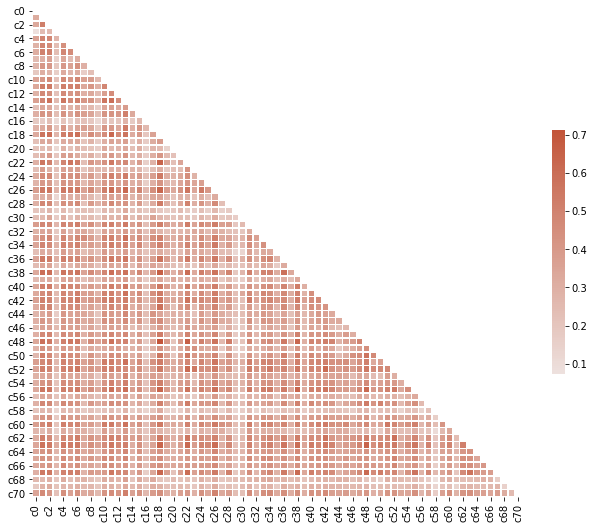

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Depois destes gráficos de correlação, parece que todas correlações são fracas (menores que 0,7) e A maioria é correlação positiva (ou seja, quando uma célula aumenta uma resposta, a outra também aumenta).

Diferente do que foi visto com os genes, mas ainda assim, correlações fracas como nos genes

###Conhecendo as amostras tratadas com as Drogas

#####recolher essa parte

In [ ]:
genes_droga = dados_exp.query('tratamento =="com_droga"')
genes_droga = genes_droga.drop(genes_droga.loc[:,'c0':'c99'],axis=1)
genes_droga

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,-0.9041,-0.8089,0.6598,-0.4772,0.1289,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,3.1050,0.0204,-0.0961,0.2919,-0.4584,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4954,-0.1840,-1.1110,-0.5649,-0.2617,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,0.2239,0.4428,-0.2822,-0.8175,1.4930,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2094,1.1270,0.1874,-0.0465,1.0560,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1

In [ ]:
#Essa Tabela é só pra ver mais ou menos a cara desse groupby
drogas_count = genes_droga.groupby(['droga','tempo','dose']).count()
drogas_count.head(10)

id  tratamento  g0  g1  g2  ...  g767  g768  g769  g770  g771
droga     tempo dose                              ...                              
00199ff52 24    D1     1           1   1   1   1  ...     1     1     1     1     1
                D2     1           1   1   1   1  ...     1     1     1     1     1
          48    D1     1           1   1   1   1  ...     1     1     1     1     1
                D2     1           1   1   1   1  ...     1     1     1     1     1
          72    D1     1           1   1   1   1  ...     1     1     1     1     1
                D2     1           1   1   1   1  ...     1     1     1     1     1
00251fc41 24    D1     1           1   1   1   1  ...     1     1     1     1     1
                D2     1           1   1   1   1  ...     1     1     1     1     1
          48    D1     1           1   1   1   1  ...     1     1     1     1     1
                D2     1           1   1   1   1  ...     1     1     1     1     1

[10 rows x 774 columns]

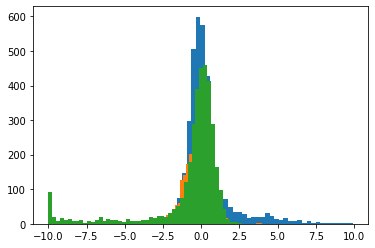

In [ ]:
a = genes_droga.query('tempo =="24" & dose =="D1"')
pyplot.hist(a['g0'],bins=50, label ='g0' )
pyplot.hist(a['g1'],bins=50, label ='g1' )
pyplot.hist(a['g50'],bins=50, label ='g50' )
pyplot.show()
#aqui ele junta todas as drogas no plot.

In [ ]:
##plt.figure(figsize=(10,8))
##sns.boxplot(y='g0', x= 'tempo', data=genes_droga, hue= 'droga')
##plt.show()

#Assim são muitas drogas, melhor optar só por olhar só para algumas

Banco de dados de resultados

Vemos que essa tabela de resultados diz os Mecanismos ativados em cada amostra (identificada pelo id). Existem 207 colunas, ou seja 207 mecanismos mapeados nas amostras.

Podemos calcular para cada amostra o total de Mecanismos ativos (MoA) nela:

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Podemos incluir uma coluna no final para dizer se eram do tratamento droga ou controle:

In [295]:
dummy_tratamento = pd.get_dummies(dados_exp['tratamento'])

In [296]:
dados_tratamento_result = pd.concat([dados_resultados, dummy_tratamento], axis=1)
dados_tratamento_result

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,com_controle,com_droga
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


#####Tabela de MoAs + variável dummie para controle ou droga

In [301]:
dados_tratamento_result.groupby(['n_moa','com_controle','com_droga']).count()

id  ...  wnt_inhibitor
n_moa com_controle com_droga         ...               
0     0            1           7501  ...           7501
      1            0           1866  ...           1866
1     0            1          12532  ...          12532
2     0            1           1538  ...           1538
3     0            1            303  ...            303
4     0            1             55  ...             55
5     0            1             13  ...             13
7     0            1              6  ...              6

[8 rows x 207 columns]

###Dessa última tabela podemos ver que :


1.   100% das amostras do Controle não ativou nenhum mecanismo de ação (MoA)
2.   7501 amostras tratadas com alguma droga, não ativou nenhum MoA
3.   O maior número de MoA é 7, ou seja, 7 vias celulares diferentes foram ativadas. Vemos que foi o caso em 6 amostras (provavelmente da mesma droga, nas 6 condições)
4.   A maior parte das drogas ativou apenas 1 MoA - total de aprox 12mil amostras





###Quantas drogas estão dentro dessas 7501 amostras que não ativou nenhum MoA?

In [335]:
col_n_moa = dados_resultados.drop(dados_resultados.iloc[:,1:207],axis=1)
col_n_moa

,id,n_moa
0,id_000644bb2,1
1,id_000779bfc,0
2,id_000a6266a,3
3,id_0015fd391,0
4,id_001626bd3,1
...,...,...
23809,id_fffb1ceed,1
23810,id_fffb70c0c,1
23811,id_fffc1c3f4,0
23812,id_fffcb9e7c,1


In [339]:
tratamento_nmoa = pd.merge(dados_exp[['id','tratamento','droga','tempo','dose']], col_n_moa[['id','n_moa']], on='id')
tratamento_nmoa

,id,tratamento,droga,tempo,dose,n_moa
0,id_000644bb2,com_droga,b68db1d53,24,D1,1
1,id_000779bfc,com_droga,df89a8e5a,72,D1,0
2,id_000a6266a,com_droga,18bb41b2c,48,D1,3
3,id_0015fd391,com_droga,8c7f86626,48,D1,0
4,id_001626bd3,com_droga,7cbed3131,72,D2,1
...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,df1d0a5a1,24,D2,1
23810,id_fffb70c0c,com_droga,ecf3b6b74,24,D2,1
23811,id_fffc1c3f4,com_controle,cacb2b860,48,D2,0
23812,id_fffcb9e7c,com_droga,8b87a7a83,24,D1,1


In [345]:
droga_nenhum_moa =tratamento_nmoa.query('n_moa == "0" & tratamento == "com_droga"')
droga_nenhum_moa

,id,tratamento,droga,tempo,dose,n_moa
1,id_000779bfc,com_droga,df89a8e5a,72,D1,0
3,id_0015fd391,com_droga,8c7f86626,48,D1,0
6,id_001bd861f,com_droga,746ca1f5a,24,D2,0
8,id_00224bf20,com_droga,952b76dfc,48,D1,0
14,id_002d31e2c,com_droga,e0cd5c091,72,D1,0
...,...,...,...,...,...,...
23795,id_ffdd24c81,com_droga,e234cbb34,72,D2,0
23801,id_fff26b3c2,com_droga,24c787f29,24,D2,0
23804,id_fff506720,com_droga,74515bfd2,24,D1,0
23806,id_fff790a17,com_droga,47dd8f190,48,D2,0


In [356]:
droga_nenhum_moa.groupby(['droga']).nunique()

,id,tratamento,tempo,dose,n_moa
droga,,,,,
00199ff52,6,1,3,2,1
018e6eb14,6,1,3,2,1
01ee58f64,6,1,3,2,1
02084574f,6,1,3,2,1
0212c63a7,6,1,3,2,1
...,...,...,...,...,...
ff32d9c31,6,1,3,2,1
ff539cce7,6,1,3,2,1
ff55b75c9,6,1,3,2,1


###De acordo com a tabela acima vemos que 1212 drogas não tiveram efeito algum

Agora procurando a(s) que ativou o maior número de MoA (7):

In [364]:
droga_max_moa =tratamento_nmoa.query('n_moa == "7"')
droga_max_moa

,id,tratamento,droga,tempo,dose,n_moa
4849,id_344ef5019,com_droga,91dc8bab8,72,D1,7
14316,id_9a2203dad,com_droga,91dc8bab8,72,D2,7
17645,id_bd978e25d,com_droga,91dc8bab8,48,D1,7
19186,id_cddde768c,com_droga,91dc8bab8,24,D2,7
20584,id_dceb9fdf8,com_droga,91dc8bab8,24,D1,7
21197,id_e3626b4d9,com_droga,91dc8bab8,48,D2,7


In [365]:
droga_max_moa.groupby(['droga']).nunique()

,id,tratamento,tempo,dose,n_moa
droga,,,,,
91dc8bab8,6,1,3,2,1


###Daqui, vemos quea droga '91dc8bab8' foi a única que ativou 7 MoA (em todos os tempos e doses testados).

###Como essa droga de máximo efeito se difere de uma amostra controle na sua distribuição dos valores de alguns genes/células:

#####Genes:

In [385]:
maximoecontrole = dados_exp.query('droga =="cacb2b860"| droga == "91dc8bab8"')
maximoecontrole

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0.0938,-0.6062,0.6108,-0.4900,0.1075,0.3029,-0.1369,0.1946,0.1745,1.1030,0.3

In [382]:
maximoecontrole['droga'].value_counts(normalize = True)

cacb2b860    0.996795
91dc8bab8    0.003205
Name: droga, dtype: float64

In [383]:
maximoecontrole['tempo'].value_counts(normalize = True)

48    0.347222
72    0.327991
24    0.324786
Name: tempo, dtype: float64

In [402]:
maximoecontrole.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,...,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000
mean,48.076923,-0.073668,-0.279168,-0.031001,0.088351,-0.257261,-0.087882,0.317942,-0.195201,0.372042,0.294426,-0.014023,-0.053317,0.548055,0.167755,0.017139,-0.094470,0.383702,0.185017,-0.038201,-0.192340,0.254606,-0.232915,-0.244766,-0.138010,0.039816,0.233874,0.421256,-0.286488,0.414613,-0.126062,0.015790,0.166566,-0.200611,0.421963,-0.352454,0.168346,-0.078959,0.044770,-0.106064,...,0.224692,0.086652,-0.046537,0.003331,0.113766,0.141671,0.060388,0.122753,0.148817,0.158128,0.062598,0.135210,0.229913,0.440614,0.169094,0.181136,0.166170,0.085977,0.163692,0.168917,0.116367,0.170112,0.125665,0.065846,0.275322,0.123568,0.240614,0.004628,0.060231,-0.000619,0.134034,0.104964,-0.014299,0.242686,0.238385,0.169444,0.131302,0.139779,0.258959,0.242921
std,19.395748,0.924002,0.909233,1.024589,0.889520,1.098168,1.133692,0.968319,1.006318,0.881919,0.897147,1.026104,0.892961,1.215017,0.882590,0.936282,0.642971,1.059275,0.908468,0.614369,0.856168,0.959603,1.007825,0.692642,0.769494,0.990147,0.737547,0.963944,1.045428,0.778169,0.908811,0.851054,1.000730,0.864733,0.961159,0.834574,0.938332,0.989969,0.968811,1.136598,...,0.913482,0.783430,0.917139,1.004458,0.862444,0.839886,0.839774,0.998716,0.861261,0.774276,0.895636,0.849112,0.911975,0.867868,0.710698,0.898308,0.767242,0.900745,0.834465,0.865025,0.843213,1.044236,0.904051,0.885143,0.953752,0.881032,0.838779,0.804176,0.843680,0.838852,0.879376,0.860096,0.928285,0.888764,0.958388,0.848899,0.883748,0.856732,0.799563,0.802561
min,24.000000,-4.859000,-3.341000,-9.104000,-2.910000,-5.805000,-10.000000,-4.981000,-5.470000,-10.000000,-4.387000,-6.795000,-3.135000,-4.893000,-2.951000,-8.938000,-2.976000,-6.147000,-6.828000,-2.914000,-10.000000,-7.972000,-5.700000,-5.635000,-4.193000,-6.254000,-4.095000,-4.836000,-4.406000,-6.436000,-6.220000,-8.646000,-2.956000,-4.713000,-3.194000,-5.053000,-4.700000,-10.000000,-7.930000,-3.320000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-8.485000,-10.000000,-10.000000,-10.000000,-10.000000,-5.378000,-10.000000,-7.326000,-10.000000,-10.000000,-9.944000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.794000,-10.000000,-9.904000
25%,24.000000,-0.636450,-0.879625,-0.588850,-0.434775,-0.905950,-0.537075,-0.215075,-0.803675,-0.101350,-0.240850,-0.628325,-0.582200,-0.176650,-0.363325,-0.454375,-0.497875,-0.234850,-0.249500,-0.348250,-0.612300,-0.267050,-0.821900,-0.613300,-0.618800,-0.582025,-0.239250,-0.088025,-0.925250,-0.055175,-0.694525,-0.426225,-0.331300,-0.730450,-0.155175,-0.836825,-0.432400,-0.626075,-

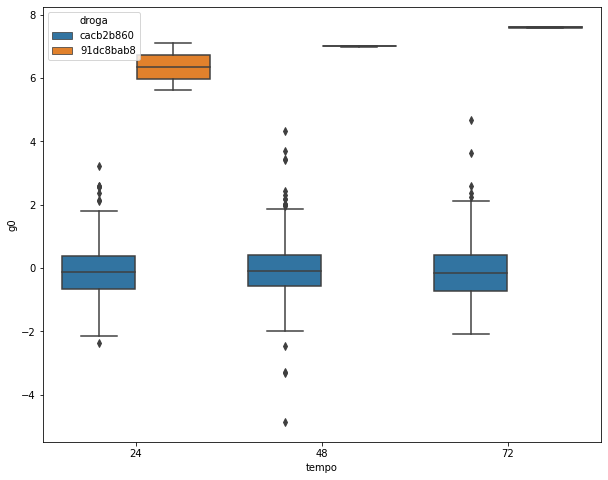

In [404]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x= 'tempo' , data=maximoecontrole, hue= 'droga')
plt.show()

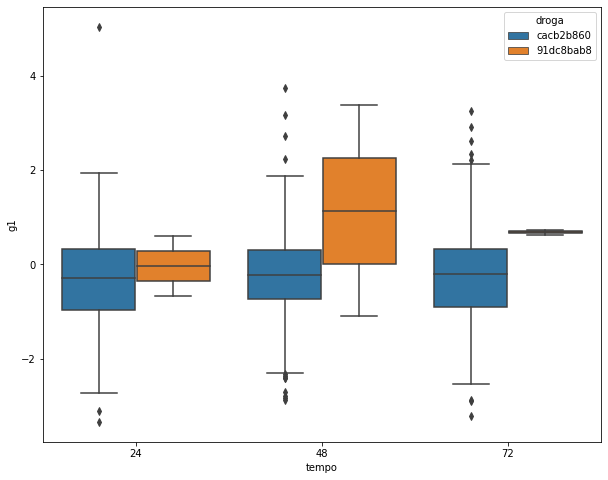

In [405]:
plt.figure(figsize=(10,8))

sns.boxplot(y='g1', x= 'tempo' , data=maximoecontrole, hue= 'droga')
plt.show()

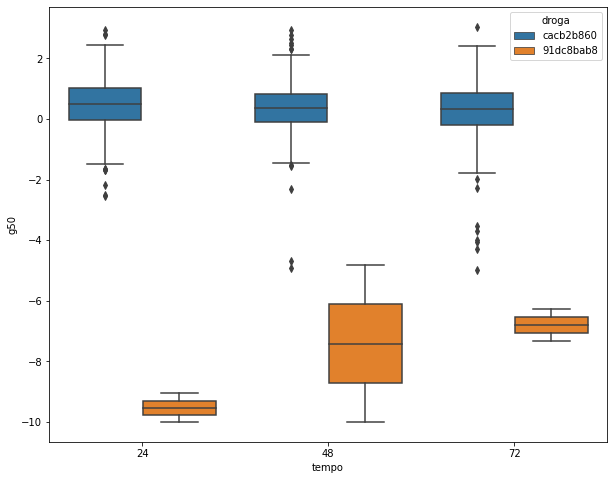

In [406]:
plt.figure(figsize=(10,8))

sns.boxplot(y='g50', x= 'tempo' , data=maximoecontrole, hue= 'droga')
plt.show()

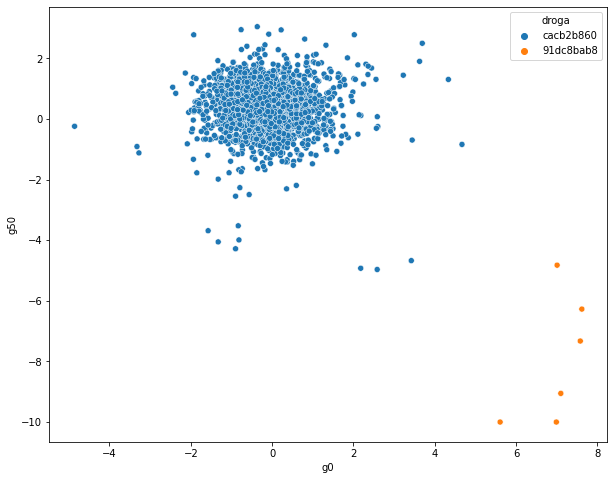

In [412]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='g0', y = 'g50', data=maximoecontrole, hue ='droga')

#####Células:

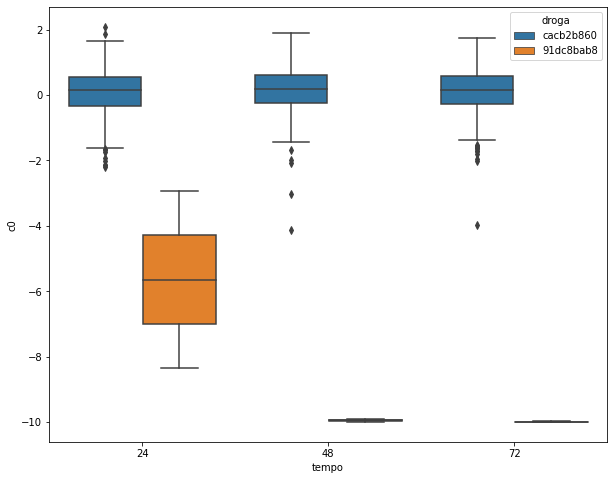

In [413]:
plt.figure(figsize=(10,8))
sns.boxplot(y='c0', x= 'tempo' , data=maximoecontrole, hue= 'droga')
plt.show()

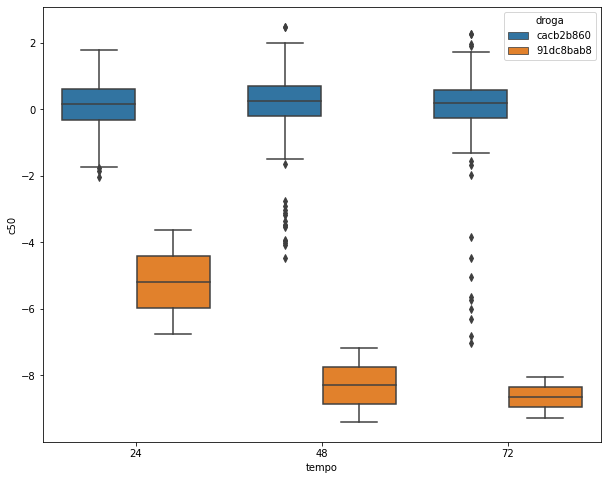

In [414]:
plt.figure(figsize=(10,8))

sns.boxplot(y='c50', x= 'tempo' , data=maximoecontrole, hue= 'droga')
plt.show()

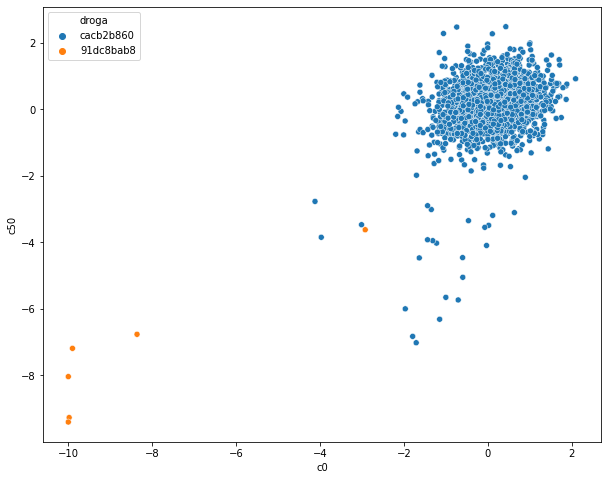

In [415]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='c0', y = 'c50', data=maximoecontrole, hue ='droga')

###Da pra ver claramente como o a distribuição dos dados controle é muito diferente dos dados da droga '91dc8bab8'. Tanto na distruibuição de alguns genes como de células. <br>
###Mas é importante lembrar a droga ' só possui 6 amostras em todo o conjunto de dados, o que da pouco poder estatístico para dizer das diferenças entre os dois grupos.